In [1]:
from learningAgent import LearningAlgorithm
from environment import Model, AdversaryModes
from Qtable import QTable
from test import Test
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(11)

In [3]:
total_demand = 400
agent_cost = 57
adversary_cost = 71 
costs = [agent_cost,adversary_cost]
total_stages = 25
adversary_probabilities=[0]*len(AdversaryModes)
# Below is where we decide what adversaries we train against- see environment.py for the numbers
# Replace * and ** with the two number associated with the opponents at the bottom of environment.py
# adversary_probabilities[10]= 0.5
adversary_probabilities[11] = 1
game = Model(total_demand, costs, total_stages, adversary_probabilities)

In [4]:
number_actions = 50
number_demands = total_demand + 1
discount_factor = 1
number_episodes = 100_000_000
constant = int(number_episodes/49)
print(constant)

2040816


In [5]:
# Learning rate is given as [numerator,denominator] which gives us a learning rate function of 
# numerator/(n+denominator)
Qtable = QTable(number_demands, number_actions, total_stages , learning_rate = [constant,constant])

In [6]:
algorithm = LearningAlgorithm(game, Qtable, number_episodes, discount_factor)

0 0.5816011851524414
Current payoff for adversary 1:  68275.0
Current payoff for adversary 1:  91913.0
Current payoff for adversary 1:  54020.0
Current payoff for adversary 1:  82076.0
Current payoff for adversary 1:  84520.0
Current payoff for adversary 1:  92376.0
Current payoff for adversary 1:  97163.0
Current payoff for adversary 1:  96925.0
Current payoff for adversary 1:  98503.0
Current payoff for adversary 1:  102036.0
Current payoff for adversary 1:  91161.0
Current payoff for adversary 1:  81958.0
Current payoff for adversary 1:  104372.0
Current payoff for adversary 1:  93292.0
Current payoff for adversary 1:  100358.0
Current payoff for adversary 1:  86605.0
Current payoff for adversary 1:  95709.0
Current payoff for adversary 1:  94686.0
Current payoff for adversary 1:  100752.0
Current payoff for adversary 1:  101333.0
Current payoff for adversary 1:  82308.0
Current payoff for adversary 1:  94853.0
Current payoff for adversary 1:  67820.0
Current payoff for adversary 1:

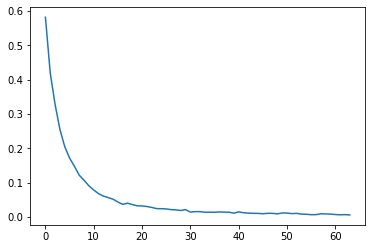

In [7]:
# Below is the first stage of learning- actions are chosen randomly.
number_episodes_per_round = 100_000
number_rounds = int(number_episodes / number_episodes_per_round)
errors = np.zeros(number_rounds)
final_round = 0
opponent1_results = list()
#opponent2_results = list()
for round_ in range(number_rounds):
    algorithm.continue_learning(number_episodes_per_round,number_episodes_per_round * round_ +1)
    adversary_probabilities[11]= 1
    # adversary_probabilities[11] = 0.5
    result = Test(game, Qtable, discount_factor, adversary_probabilities)
    errors[round_] = result.error(1000)
    if round_ % 50 == 0:
        print(round_, errors[round_])
    if round_ > 10 and np.max(errors[round_-10:round_]) < 0.01:
        print(round_)
        final_round = round_
        break
        
    adversary_probabilities=[0]*len(AdversaryModes)
    adversary_probabilities[11]=1
    result = Test(game, Qtable, discount_factor, adversary_probabilities)
    payoff1, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
    opponent1_results.append(payoff1)
    print('Current payoff for adversary 1: ', payoff1)
    
   # adversary_probabilities=[0]*len(AdversaryModes)
   # adversary_probabilities[11]=1
   # result = Test(game, Qtable, discount_factor, adversary_probabilities)
   # payoff2, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
    # opponent2_results.append(payoff2)
    # print('Current payoff for adversary 2: ', payoff2)
    
    if (round_ == number_rounds - 1):
        final_round = round_
    
plt.plot(errors[0:final_round+1])

In [ ]:
# Below is the second stage of learning- actions are chosen according to an epsilon greedy strategy.
episode_counter = (final_round + 1) * number_episodes_per_round
episodes_left = number_episodes - episode_counter
number_episodes_per_round = 500_000
number_rounds = int(episodes_left / number_episodes_per_round)

for round_ in range(number_rounds): 
    print('Round ', round_, ' of ', number_rounds)
    algorithm.epsilon_greedy_learning(number_episodes_per_round, episode_counter)
    
    adversary_probabilities=[0]*len(AdversaryModes)
    adversary_probabilities[11]=1
    result = Test(game, Qtable, discount_factor, adversary_probabilities)
    payoff1, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
    opponent1_results.append(payoff1)
    print('Current payoff for adversary 1: ', payoff1)
    
#     adversary_probabilities=[0]*len(AdversaryModes)
#     adversary_probabilities[11]=1
#     result = Test(game, Qtable, discount_factor, adversary_probabilities)
#     payoff2, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
#     opponent2_results.append(payoff2)
#     print('Current payoff for adversary 2: ', payoff2)
    
    episode_counter += number_episodes_per_round
    
plt.plot(opponent1_results)
# plt.plot(opponent2_results)
plt.title("Payoff over the rounds")
plt.xlabel("Rounds")
plt.ylabel("Payoff at the end of each round")
legend = ["adversary 1"]
plt.legend(legend)

Round  0  of  187
Best payoff:  128870
Best actions:  [113, 122, 124, 125, 125, 125, 125, 112, 110, 109, 109, 110, 103, 114, 104, 106, 111, 110, 101, 112, 107, 107, 112, 116, 127]
Current payoff for adversary 1:  128294.0
Round  1  of  187
Best payoff:  131295
Best actions:  [111, 124, 125, 124, 125, 124, 125, 129, 120, 118, 121, 112, 112, 111, 108, 122, 114, 104, 107, 117, 109, 120, 107, 112, 130]
Current payoff for adversary 1:  130908.0
Round  2  of  187
Best payoff:  132769
Best actions:  [111, 125, 125, 125, 125, 124, 124, 125, 132, 116, 132, 114, 119, 106, 113, 110, 116, 108, 111, 114, 114, 111, 109, 112, 131]
Current payoff for adversary 1:  132769.0
Round  3  of  187
Best payoff:  133218
Best actions:  [111, 125, 125, 125, 125, 125, 124, 125, 132, 117, 121, 116, 121, 108, 112, 110, 116, 108, 111, 114, 114, 111, 109, 112, 131]
Current payoff for adversary 1:  132096.0
Round  4  of  187
Best payoff:  133918
Best actions:  [111, 124, 125, 125, 125, 125, 125, 124, 124, 126, 126, 11

Best payoff:  138569
Best actions:  [111, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 124, 125, 123, 123, 121, 117, 133]
Current payoff for adversary 1:  138569.0
Round  38  of  187
Best payoff:  138581
Best actions:  [111, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 124, 125, 123, 123, 121, 115, 133]
Current payoff for adversary 1:  138569.0
Round  39  of  187
Best payoff:  138586
Best actions:  [111, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 124, 125, 123, 123, 121, 113, 134]
Current payoff for adversary 1:  138569.0
Round  40  of  187
Best payoff:  138581
Best actions:  [111, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 124, 125, 123, 123, 121, 111, 133]
Current payoff for adversary 1:  138569.0
Round  41  of  187
Best payoff:  138581
Best actions:  [111, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 1

In [ ]:
Qtable.save("Qtable_guess125")

df1 = pd.DataFrame(opponent1_results)
#df2 = pd.DataFrame(opponent2_results)

writer = pd.ExcelWriter('payoff_11.xlsx', engine='xlsxwriter')
df1.to_excel(writer, sheet_name='payoff_11', index=False)
#df2.to_excel(writer, sheet_name='payoff2', index=False)
writer.save()

In [ ]:
# We now have the trained agent. We want to test it against each opponent individually, so that
# we can compare it against the agent that is just trained against this opponent. 

In [ ]:
adversary_probabilities=[0]*len(AdversaryModes)
# Testing against one type of opponent by changing the * below to be the first number
adversary_probabilities[10]=1
result = Test(game, Qtable, discount_factor, adversary_probabilities)
payoff, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
print(payoff)
print(adversary_payoff)
print(actions)
print(adversary_actions)
print(demand_potential)

In [ ]:
adversary_probabilities=[0]*len(AdversaryModes)
# Testing against one type of opponent by changing the * below to be the first number
adversary_probabilities[11]=1
result = Test(game, Qtable, discount_factor, adversary_probabilities)
payoff, adversary_payoff, actions, adversary_actions, demand_potential = result.total_payoff()
print(payoff)
print(adversary_payoff)
print(actions)
print(adversary_actions)
print(demand_potential)